In [14]:
from dotenv import load_dotenv
from typing import TypedDict
from langgraph.graph import StateGraph, START , END 

In [15]:
class BatsmanState(TypedDict):

    runs: int
    balls: int 
    fours: int 
    sixes: int 

    sr:float 
    bpb:float 
    bp:float 
    summary:str 


In [16]:
def calculate_sr(state:BatsmanState):
    sr = (state["runs"]/ state["balls"])*100

    return {"sr":sr}

In [24]:
def calculate_bpb(state:BatsmanState):
    
    bpb = state["balls"] / (state["fours"] + state["sixes"]) 

    return {"bpb": bpb} 

In [25]:
def calculate_bp(state:BatsmanState):
    bp = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100

    return {"bp":bp}

In [31]:
def summary(state:BatsmanState):
    summary = f"""
Strike Rate - {state['sr']} \n
Balls per boundary - {state['bpb']} \n
Boundary percent - {state['bp']}
"""
    
    return {'summary': summary}

In [32]:
graph = StateGraph(BatsmanState)

graph.add_node("calculate_sr", calculate_sr)
graph.add_node("calculate_bpb", calculate_bpb)
graph.add_node("calculate_bp", calculate_bp)
graph.add_node("summary", summary)

graph.add_edge(START, "calculate_sr")
graph.add_edge(START, "calculate_bpb")
graph.add_edge(START, "calculate_bp")

graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_bp', 'summary')

graph.add_edge("summary", END)

workflow = graph.compile()


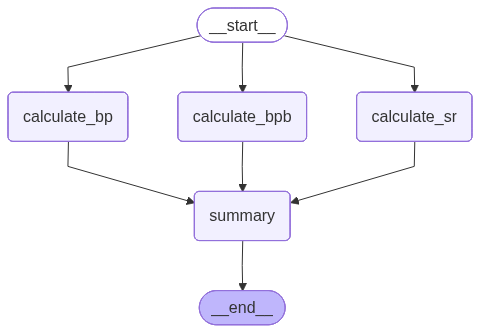

In [33]:
workflow

In [34]:
intial_state = {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}

In [35]:
final_state = workflow.invoke(intial_state)
print(final_state)

{'runs': 100, 'balls': 50, 'fours': 6, 'sixes': 4, 'sr': 200.0, 'bpb': 5.0, 'bp': 48.0, 'summary': '\nStrike Rate - 200.0 \n\nBalls per boundary - 5.0 \n\nBoundary percent - 48.0\n'}


In [ ]:
final_state

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'bp': 48.0,
 'summary': '\nStrike Rate - 200.0 \n\nBalls per boundary - 5.0 \n\nBoundary percent - 48.0\n'}